# Описание датасета, EDA

Датасет содержит информацию о клиентах банка, которые либо ушли, либо остались клиентами банка

Список фичей:

    •   Customer ID: Уникальный идентификатор каждого клиента.
    •   Surname: Фамилия клиента.
    •   Credit Score: Числовое значение, представляющее кредитный рейтинг клиента.
    •   Geography: Страна проживания клиента (Франция, Испания или Германия).
    •   Gender: Пол клиента (Мужской или Женский).
    •   Age: Возраст клиента.
    •   Tenure: Количество лет, которое клиент обслуживается в банке.
    •   Balance: Баланс на счёте клиента.
    •   NumOfProducts: Количество банковских продуктов, которыми пользуется клиент (например, сберегательный счёт, кредитная карта).
    •   HasCrCard: Наличие кредитной карты у клиента (1 = да, 0 = нет).
    •   IsActiveMember: Является ли клиент активным членом банка (1 = да, 0 = нет).
    •   EstimatedSalary: Предполагаемая заработная плата клиента.
    •   Exited: Ушёл ли клиент (1 = да, 0 = нет), таргет.

Задача - бинарная классификация, предсказывание вероятности ухода клиента для тестового набора данных

В качестве baseline построен sample_submission.csv, в котором вероятность ухода каждого клиента - 0.5


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install ydata-profiling --quiet

In [3]:
!gdown 1XCFRgfoG0mK08v1tDCgJXBcPK6PbaVQ7 # test
!gdown 1ItKuMwuaqWcHCCmJ7Wj8neNgs1PPrpLy # train
!gdown 1lX2th7npV67Qzd1NLgv3rvEJyHuu4ZBD # test_submission

zsh:1: command not found: gdown
zsh:1: command not found: gdown
zsh:1: command not found: gdown


### Предобработка датасета

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
target = "Exited"

In [5]:
def encode_categorical_features(train, test=None, categorical_features=['Geography', 'Gender']):
    """
    Кодирует категориальные признаки с помощью LabelEncoder
    """
    label_encoders = {}

    for feature in categorical_features:
        le = LabelEncoder()
        # Обработка train
        train[feature] = le.fit_transform(train[feature])

        # Обработка test
        if test is not None and feature in test.columns:
            test[feature] = le.transform(test[feature])

        label_encoders[feature] = le

    if test is not None:
        return train, test, label_encoders
    else:
        return train, label_encoders

In [6]:
train, _ = encode_categorical_features(train)

In [7]:
to_drop = ['id', 'CustomerId', 'Surname']
train = train.drop(columns=to_drop)

## EDA

In [8]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train, title="Final_Project")

profile.to_notebook_iframe()
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 2134.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,675.0,0,0,48.0,7.0,143582.89,2.0,0.0,0.0,93844.82,1.0
1,673.0,0,0,37.0,7.0,0.00,2.0,0.0,0.0,170980.86,0.0
2,607.0,0,1,29.0,4.0,0.00,2.0,0.0,1.0,61290.99,0.0
3,669.0,0,0,28.0,2.0,0.00,2.0,1.0,0.0,97734.30,0.0
4,743.0,0,1,24.0,7.0,0.00,2.0,1.0,0.0,180800.42,0.0


In [10]:
train.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,658.223400,0.620867,0.561600,37.850067,5.03080,42636.168488,1.585733,0.779933,0.494400,117924.109015,0.201133
std,72.851215,0.823065,0.496207,8.185959,2.80209,59570.493235,0.529026,0.414305,0.499985,45698.606770,0.400861
min,437.000000,0.000000,0.000000,18.000000,0.00000,0.000000,1.000000,0.000000,0.000000,11.570000,0.000000
25%,601.000000,0.000000,0.000000,32.000000,3.00000,0.000000,1.000000,1.000000,0.000000,83419.440000,0.000000
50%,660.000000,0.000000,1.000000,37.000000,5.00000,0.000000,2.000000,1.000000,0.000000,123475.880000,0.000000
75%,708.000000,1.000000,1.000000,42.000000,7.00000,109079.755000,2.000000,1.000000,1.000000,157564.750000,0.000000
max,850.000000,2.000000,1.000000,72.000000,20.00000,187911.550000,4.000000,1.000000,1.000000,199953.330000,1.000000


In [11]:
num_cols = train.select_dtypes(include=['number']).columns.tolist()

In [12]:
# График дисбаланса классов целевой переменной
target_cnt = train[target].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=target_cnt.index, y=target_cnt.values)
plt.title('Дисбаланс классов целевой переменной')
plt.xlabel('Exited')
plt.ylabel('Количество клиентов')
plt.xticks([0, 1], ['Остался', 'Ушел'])

for i, v in enumerate(target_cnt.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

/var/folders/5l/y0rwpymj7b32n_v1n34_p57w0000gn/T/ipykernel_8450/2901320096.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [13]:
# Распределение фичей
num_cols_no_target = [col for col in num_cols if col != 'Exited']

train[num_cols_no_target].hist(bins=25, figsize=(15,10))
plt.tight_layout()
plt.show()

/var/folders/5l/y0rwpymj7b32n_v1n34_p57w0000gn/T/ipykernel_8450/2924558385.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [14]:
nan_counts = train.isna().sum()
nan_counts

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# Расчет корреляции с целевой переменной
target = 'Exited'
corr = train.corr(method='pearson')
corr_target = (
    corr[target]
    .drop(target)
    .sort_values(ascending=False)
)

plt.figure(figsize=(6, 8))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    orient="h"
)
plt.axvline(0, color="k", linewidth=0.8)
plt.title("Target correlation")
plt.tight_layout()
plt.show()

/var/folders/5l/y0rwpymj7b32n_v1n34_p57w0000gn/T/ipykernel_8450/2422869445.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


# Работа с аномалиями и генерация признаков

In [16]:
# Вспомогательные импорты
%matplotlib inline
from IPython.display import Image, display
from scipy.stats import zscore, t
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors

def save_and_display(fig, path):
    fig.savefig(path, bbox_inches="tight", dpi=120)
    plt.close(fig)
    display(Image(path))

In [ ]:
# Классическая обработка выбросов
num_all = train.select_dtypes(include=["number"]).columns.tolist()
num_all = [c for c in num_all if c != target]
binary_cols = [c for c in num_all if train[c].nunique() <= 2]
numeric_for_outliers = [c for c in num_all if c not in binary_cols]

for df in (train, test):
    df[numeric_for_outliers] = df[numeric_for_outliers].apply(pd.to_numeric, errors="coerce")

train_mean = train[numeric_for_outliers].mean()
train_std = train[numeric_for_outliers].std(ddof=1)

z_mask_train = pd.DataFrame(
    np.abs((train[numeric_for_outliers] - train_mean) / train_std) > 3,
    columns=numeric_for_outliers,
)
z_mask_test = pd.DataFrame(
    np.abs((test[numeric_for_outliers] - train_mean) / train_std) > 3,
    columns=numeric_for_outliers,
)

q1 = train[numeric_for_outliers].quantile(0.25)
q3 = train[numeric_for_outliers].quantile(0.75)
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
iqr_mask_train = pd.DataFrame(
    (train[numeric_for_outliers] < lower) | (train[numeric_for_outliers] > upper),
    columns=numeric_for_outliers,
)
iqr_mask_test = pd.DataFrame(
    (test[numeric_for_outliers] < lower) | (test[numeric_for_outliers] > upper),
    columns=numeric_for_outliers,
)

def grubbs_threshold(series, alpha=0.05):
    x = series.dropna()
    if len(x) < 3:
        return np.inf
    n = len(x)
    t_crit = t.ppf(1 - alpha / (2 * n), n - 2)
    return ((n - 1) / np.sqrt(n)) * np.sqrt(t_crit**2 / (n - 2 + t_crit**2))

gcrit = train[numeric_for_outliers].apply(grubbs_threshold)
gstat_train = np.abs(train[numeric_for_outliers] - train_mean) / train_std
gstat_test = np.abs(test[numeric_for_outliers] - train_mean) / train_std
grubbs_mask_train = gstat_train.gt(gcrit)
grubbs_mask_test = gstat_test.gt(gcrit)

In [18]:
# Сводка по выбросам
stat_outlier_mask_train = z_mask_train | iqr_mask_train | grubbs_mask_train
stat_outlier_mask_test = z_mask_test | iqr_mask_test | grubbs_mask_test

for df, mask, name in [
    (train, stat_outlier_mask_train, "train"),
    (test, stat_outlier_mask_test, "test"),
]:
    df["stat_outlier_any"] = mask.any(axis=1).astype(int)
    df["stat_outlier_count"] = mask.sum(axis=1)
    for col in numeric_for_outliers:
        df[f"{col}_outlier"] = mask[col].astype(int)

print("Исключены бинарные признаки:", binary_cols)
print("Доля строк с хотя бы одним выбросом (train):", train["stat_outlier_any"].mean().round(3))
print("Топ признаков по количеству выбросов (train):")
display(stat_outlier_mask_train.sum().sort_values(ascending=False).head())

Исключены бинарные признаки: ['Gender', 'HasCrCard', 'IsActiveMember']
Доля строк с хотя бы одним выбросом (train): 0.029
Топ признаков по количеству выбросов (train):


Age              414
NumOfProducts     19
CreditScore        9
Tenure             1
Geography          0
dtype: int64

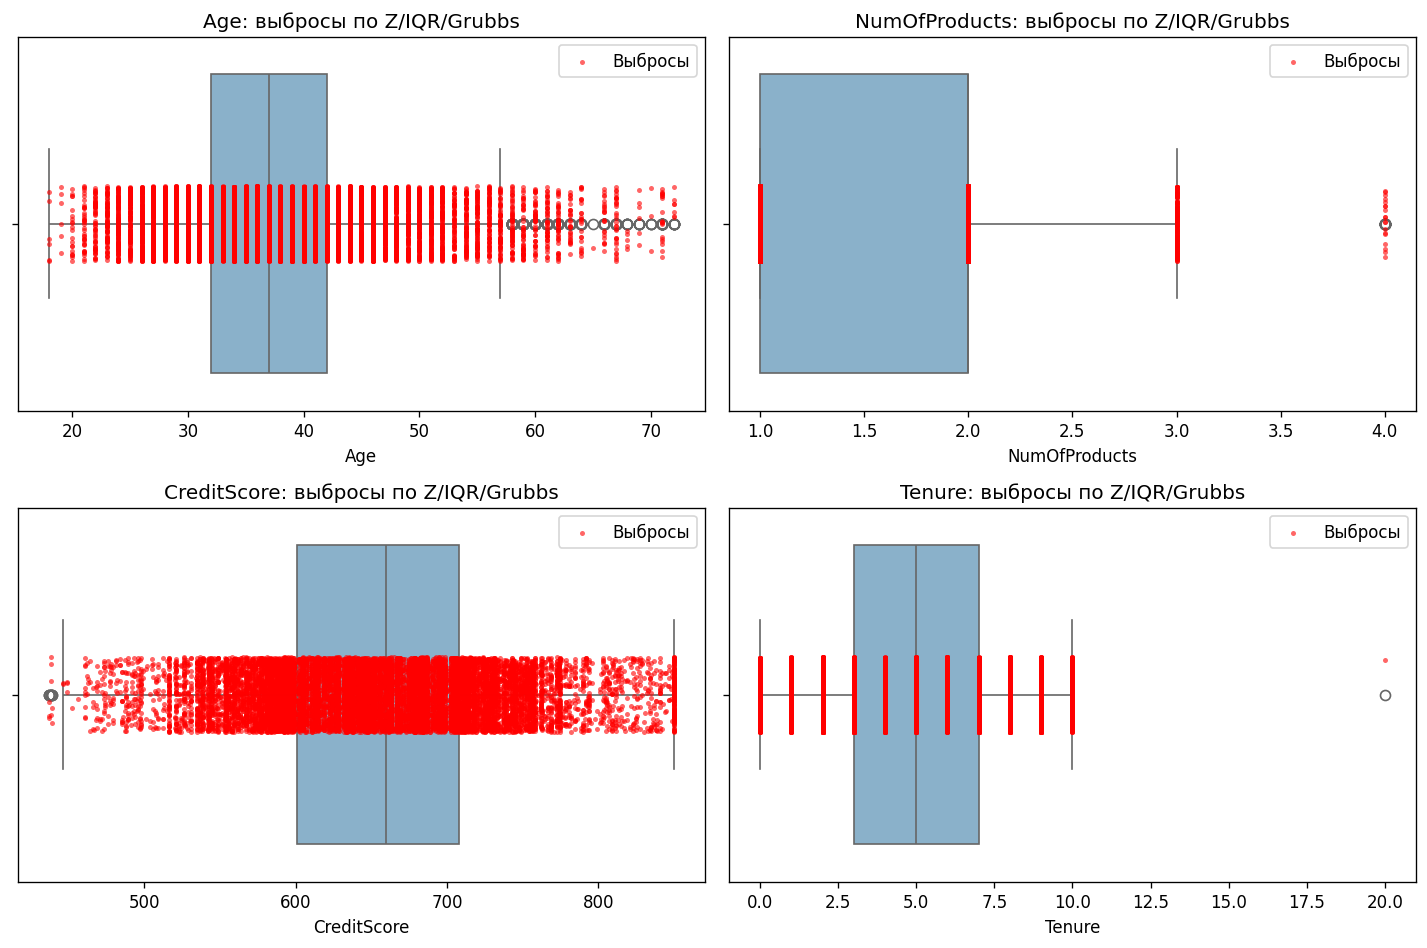

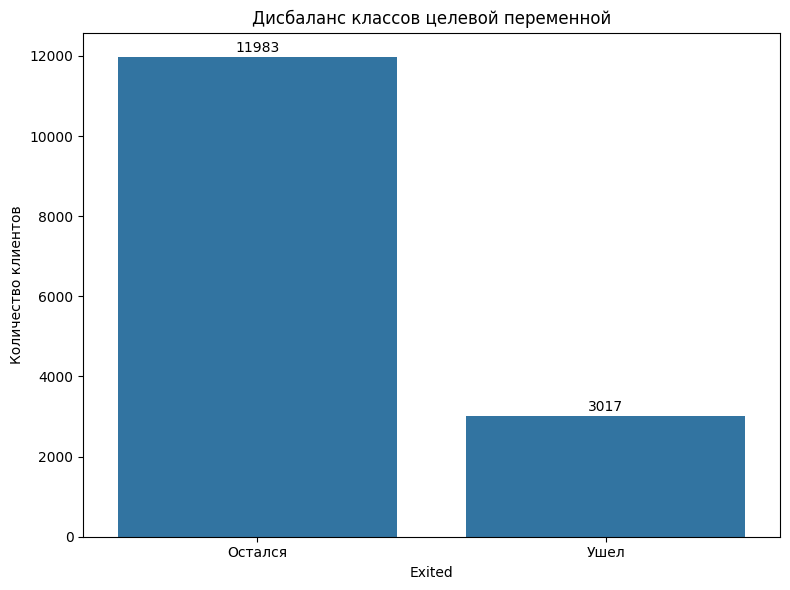

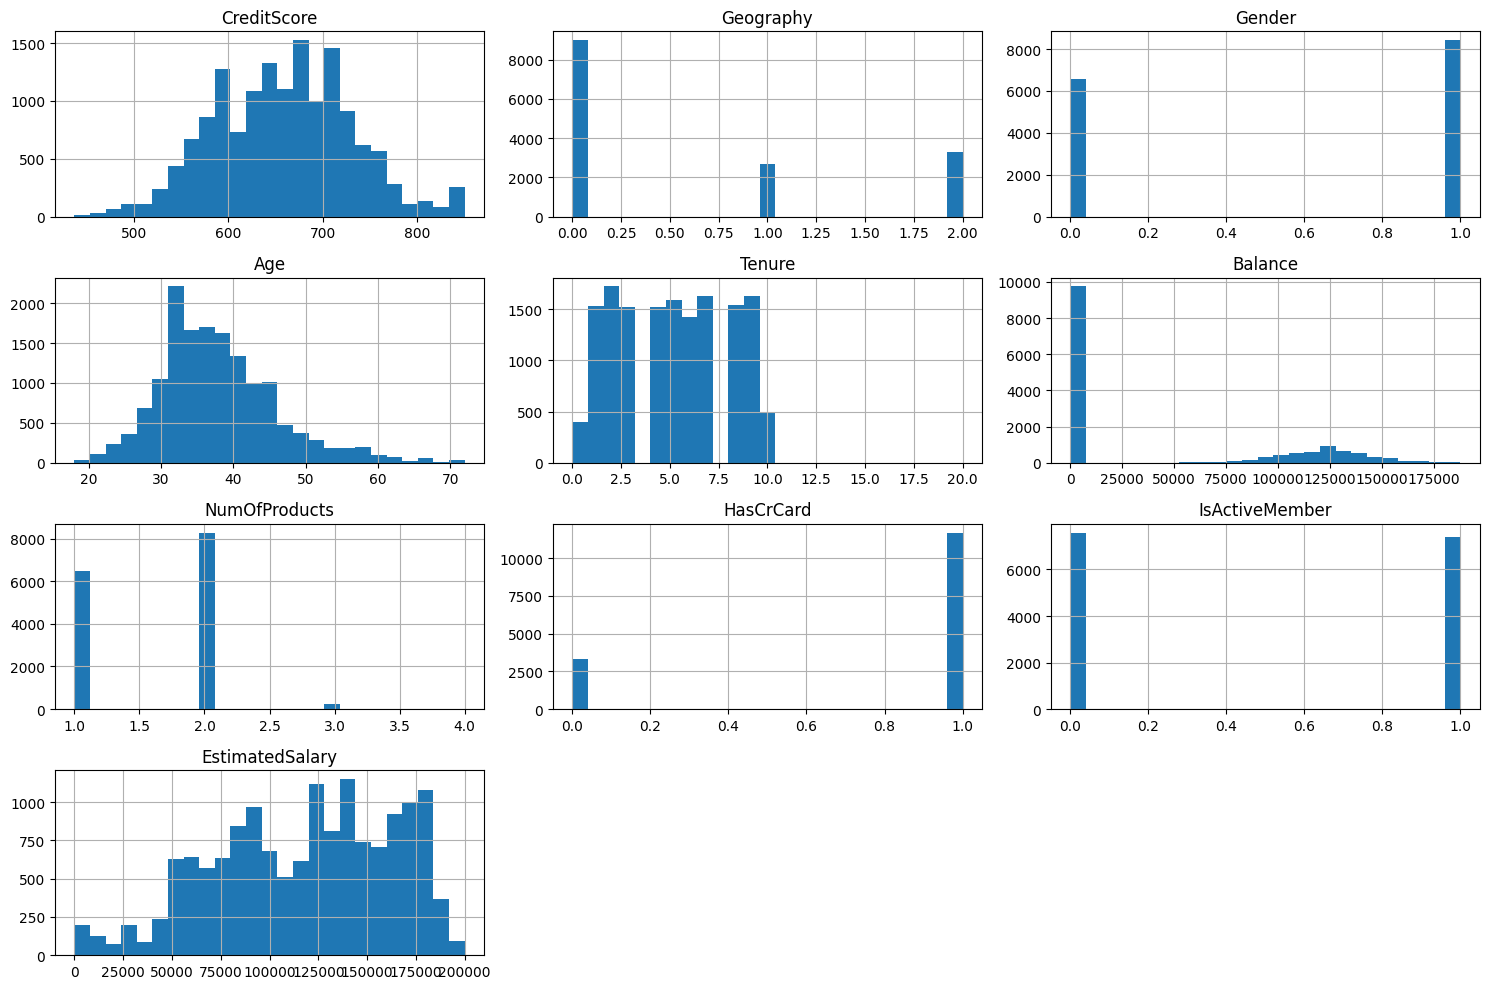

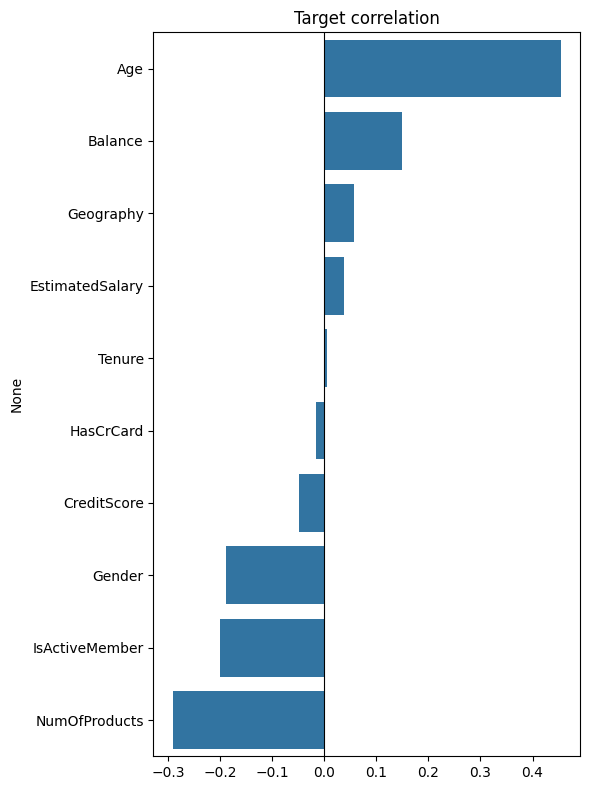

In [19]:
# Визуализация выбросов (взяты со сводки)
cols_to_plot = ["Age", "NumOfProducts", "CreditScore", "Tenure"]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.ravel(), cols_to_plot):
    sns.boxplot(x=train[col], ax=ax, color="#7fb3d5")
    sns.stripplot(
        x=train[col],
        data=train[train[f"{col}_outlier"] == 1],
        ax=ax,
        color="red",
        size=3,
        alpha=0.6,
        label="Выбросы",
    )
    ax.set_title(f"{col}: выбросы по Z/IQR/Grubbs")
    ax.legend(loc="upper right")
plt.tight_layout()
save_and_display(fig, "outliers_boxplot.png")


**Age**: выбросы с краю (58+ лет). Их немного и, в целом, бизнес‑логика допускает пожилых клиентов. Вероятность шумовых записей низкая, поэтому оставим как есть, но используем флаг Age_outlier

**NumOfProducts**: выбросы на значении 4 (редкий пакет из 4 продуктов). Это край редкого сегмента, но бизнес‑возможный. Удалять не нужно: оставим и будем использовать флаг NumOfProducts_outlier как индикатор спецпредложения

**CreditScore**: выбросы в районе низких (<450) и высоких (>850) значений. Это разумные экстремумы (очень плохой / очень хороший скоринг). Удалять не стоит, так что тоже добавим флаг CreditScore_outlier

**Tenure**: выброс вообще всего один. Удалять не нужно, но на всякий случай отметим флагом

In [20]:
# Признак плотности (kNN дистанции)
scaler = StandardScaler()
X_train = scaler.fit_transform(train[numeric_for_outliers])
X_test = scaler.transform(test[numeric_for_outliers].fillna(0))
nn = NearestNeighbors(n_neighbors=5).fit(X_train)
train_dists, _ = nn.kneighbors(X_train)
test_dists, _ = nn.kneighbors(X_test)
train["knn_mean_dist"] = train_dists[:, 1:].mean(axis=1)
test["knn_mean_dist"] = test_dists[:, 1:].mean(axis=1)

In [21]:
# ML-методы выбросов (IsolationForest, LOF)
iso = IsolationForest(contamination=0.02, random_state=42)
train["iso_outlier"] = (iso.fit_predict(X_train) == -1).astype(int)
train["iso_score"] = iso.decision_function(X_train)
test["iso_outlier"] = (iso.predict(X_test) == -1).astype(int)
test["iso_score"] = iso.decision_function(X_test)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02, novelty=True)
lof.fit(X_train)
train["lof_outlier"] = (lof.predict(X_train) == -1).astype(int)
train["lof_score"] = -lof.decision_function(X_train)
test["lof_outlier"] = (lof.predict(X_test) == -1).astype(int)
test["lof_score"] = -lof.decision_function(X_test)

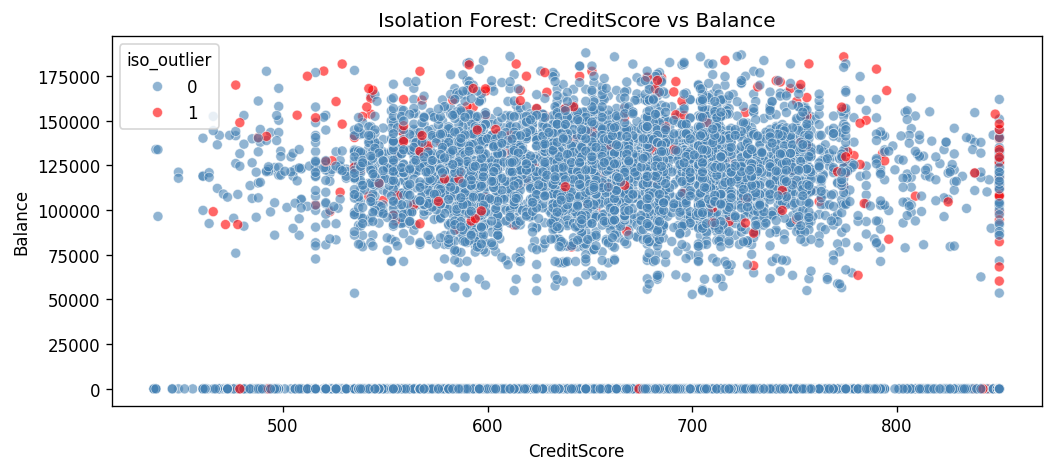

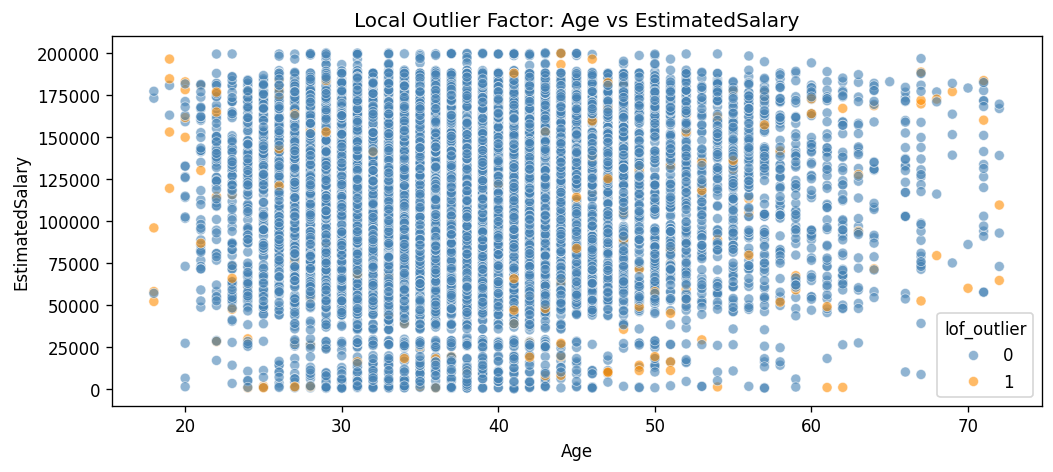

In [22]:
# Визуализация ML-меток
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(
    x=train["CreditScore"],
    y=train["Balance"],
    hue=train["iso_outlier"],
    palette=["steelblue", "red"],
    alpha=0.6,
    ax=ax,
)
ax.set_title("Isolation Forest: CreditScore vs Balance")
save_and_display(fig, "iso_cs_balance.png")

fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(
    x=train["Age"],
    y=train["EstimatedSalary"],
    hue=train["lof_outlier"],
    palette=["steelblue", "darkorange"],
    alpha=0.6,
    ax=ax,
)
ax.set_title("Local Outlier Factor: Age vs EstimatedSalary")
save_and_display(fig, "lof_age_salary.png")


In [ ]:
# Рассчитываем метрики, считая что целевые аномалии — это реальные уходы клиентов
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

y_true = train[target].astype(int)

def print_metrics(name, y_pred, score):
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    auc = roc_auc_score(y_true, score)
    print(f"{name}: precision={p:.3f}, recall={r:.3f}, f1={f1:.3f}, roc_auc={auc:.3f}")

print_metrics("Isolation Forest", train["iso_outlier"], -train["iso_score"])  # чем ниже score, тем аномальнее
print_metrics("LOF", train["lof_outlier"], -train["lof_score"]) # выше lof_score = более аномально

both_anom = (train["iso_outlier"] == 1) & (train["lof_outlier"] == 1)
only_iso = (train["iso_outlier"] == 1) & (train["lof_outlier"] == 0)
only_lof = (train["iso_outlier"] == 0) & (train["lof_outlier"] == 1)

print("\nДоля пересечения (оба метят):", both_anom.mean().round(3))
print("Доля только IsolationForest:", only_iso.mean().round(3))
print("Доля только LOF:", only_lof.mean().round(3))

print("\nПересечение с таргетом среди обоих методов:")
display(pd.crosstab(both_anom, y_true, normalize="index"))

print("Пересечение с таргетом среди only_iso:")
display(pd.crosstab(only_iso, y_true, normalize="index"))

print("Пересечение с таргетом среди only_lof:")
display(pd.crosstab(only_lof, y_true, normalize="index"))


Isolation Forest: precision=0.603, recall=0.060, f1=0.109, roc_auc=0.704
LOF: precision=0.433, recall=0.033, f1=0.062, roc_auc=0.446

Доля пересечения (оба метят): 0.005
Доля только IsolationForest: 0.015
Доля только LOF: 0.011

Пересечение с таргетом среди обоих методов:


Exited,0,1
row_0,,
False,0.801166,0.198834
True,0.328767,0.671233


Пересечение с таргетом среди only_iso:


Exited,0,1
row_0,,
False,0.804711,0.195289
True,0.418502,0.581498


Пересечение с таргетом среди only_lof:


Exited,0,1
row_0,,
False,0.800202,0.199798
True,0.675000,0.325000


Isolation Forest ловит больше целевых: LOF существенно слабее. Для признаков лучше использовать метки IF, а пересечение IF и LOF можно трактовать как жёсткие аномалии с высоким churn. LOF сейчас отдельно несёт мало пользы при текущих параметрах

# Интерпретация и диагностика моделей